In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error

from keras.models import Sequential
from keras.layers import LSTM, Dense

In [2]:
train = pd.read_csv('Google_Stock_Price_Train.csv')
train

,Date,Open,High,Low,Close,Volume
0,01/03/2012,325.250000,332.830000,324.970000,663.59,"7,380,500"
1,01/04/2012,331.270000,333.870000,329.080000,666.45,"5,749,400"
2,01/05/2012,329.830000,330.750000,326.890000,657.21,"6,590,300"
3,01/06/2012,328.340000,328.770000,323.680000,648.24,"5,405,900"
4,01/09/2012,322.040000,322.290000,309.460000,620.76,"11,688,800"
...,...,...,...,...,...,...
1504,22/12/2017,1061.109985,1064.199951,1059.439941,1060.119995,755100
1505,26/12/2017,1058.069946,1060.119995,1050.199951,1056.73999,760600
1506,27/12/2017,1057.390015,1058.369995,1048.050049,1049.369995,1271900
1507,28/12/2017,1051.599976,1054.750000,1044.770020,1048.140015,837100


In [3]:
test = pd.read_csv('Google_Stock_Price_Test.csv')
test

,Date,Open,High,Low,Close,Volume
0,02/01/2018,1048.339966,1066.939941,1045.229980,1065.000000,1237600
1,03/01/2018,1064.310059,1086.290039,1063.209961,1082.479980,1430200
2,04/01/2018,1088.000000,1093.569946,1084.001953,1086.400024,1004600
3,05/01/2018,1094.000000,1104.250000,1092.000000,1102.229980,1279100
4,08/01/2018,1102.229980,1111.270020,1101.619995,1106.939941,1047600
...,...,...,...,...,...,...
120,25/06/2018,1143.599976,1143.910034,1112.780029,1124.810059,2157300
121,26/06/2018,1128.000000,1133.209961,1116.659058,1118.459961,1563200
122,27/06/2018,1121.339966,1131.836060,1103.619995,1103.979980,1293900
123,28/06/2018,1102.089966,1122.310059,1096.010010,1114.219971,1072400


In [4]:
train.dtypes

Date       object
Open      float64
High      float64
Low       float64
Close      object
Volume     object
dtype: object

In [7]:
test.dtypes

Date       object
Open      float64
High      float64
Low       float64
Close     float64
Volume      int64
dtype: object

In [8]:
train['Close'] = train['Close'].str.replace(',','')
train['Close'] = train['Close'].astype('float64')
train.dtypes

Date       object
Open      float64
High      float64
Low       float64
Close     float64
Volume     object
dtype: object

In [13]:
train['Close'].values.reshape(-1,1)

array([[ 663.59    ],
       [ 666.45    ],
       [ 657.21    ],
       ...,
       [1049.369995],
       [1048.140015],
       [1046.400024]])

In [12]:
scaler = MinMaxScaler()

In [14]:
train_scaled = scaler.fit_transform(train['Close'].values.reshape(-1,1))
train_scaled

array([[0.23757287],
       [0.24151427],
       [0.22878051],
       ...,
       [0.76922122],
       [0.76752617],
       [0.76512827]])

In [15]:
test_scaled = scaler.fit_transform(test['Close'].values.reshape(-1,1))
test_scaled

array([[0.36415787],
       [0.46443314],
       [0.48692078],
       [0.57773056],
       [0.60474962],
       [0.60084914],
       [0.57991049],
       [0.59660413],
       [0.69263439],
       [0.6897661 ],
       [0.74839376],
       [0.73583099],
       [0.78011721],
       [0.88509687],
       [0.96632631],
       [0.93345583],
       [0.96862108],
       [1.        ],
       [0.99850843],
       [0.93030043],
       [0.96615405],
       [0.95330417],
       [0.63320352],
       [0.31138163],
       [0.45364835],
       [0.269963  ],
       [0.        ],
       [0.20800838],
       [0.28923782],
       [0.29015587],
       [0.39111951],
       [0.50481888],
       [0.53510818],
       [0.57904986],
       [0.62999071],
       [0.60297165],
       [0.71862126],
       [0.8159134 ],
       [0.66986034],
       [0.59207201],
       [0.39008732],
       [0.44401129],
       [0.51290765],
       [0.53659975],
       [0.62023881],
       [0.71408914],
       [0.90936248],
       [0.934

In [17]:
def create_seq(data, time_step=6):
    X = []
    y = []
    for i in range(len(data) - time_step):
        X.append(data[i : i + time_step])
        y.append(data[i + time_step])
    return np.array(X), np.array(y)

In [18]:
X_train, y_train = create_seq(train_scaled)
X_train.shape, y_train.shape

((1503, 6, 1), (1503, 1))

In [19]:
X_test, y_test = create_seq(test_scaled)
X_test.shape, y_test.shape

((119, 6, 1), (119, 1))

In [24]:
X_train.shape[1]

6

In [26]:
model = Sequential()

In [27]:
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1],1)))
model.add(LSTM(units=50))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 6, 50)             10400     
                                                                 
 lstm_5 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 30651 (119.73 KB)
Trainable params: 30651 (119.73 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [28]:
history = model.fit(X_train, y_train, epochs=100, batch_size=4, validation_split=0.05)

Epoch 1/100
357/357 [==============================] - 25s 20ms/step - loss: 0.0070 - val_loss: 6.3589e-04
Epoch 2/100
357/357 [==============================] - 2s 6ms/step - loss: 0.0024 - val_loss: 5.3016e-04
Epoch 3/100
357/357 [==============================] - 2s 5ms/step - loss: 0.0023 - val_loss: 6.2314e-04
Epoch 4/100
357/357 [==============================] - 2s 5ms/step - loss: 0.0020 - val_loss: 4.0407e-04
Epoch 5/100
357/357 [==============================] - 2s 5ms/step - loss: 0.0020 - val_loss: 4.2482e-04
Epoch 6/100
357/357 [==============================] - 2s 5ms/step - loss: 0.0017 - val_loss: 5.2724e-04
Epoch 7/100
357/357 [==============================] - 2s 5ms/step - loss: 0.0014 - val_loss: 4.8327e-04
Epoch 8/100
357/357 [==============================] - 2s 5ms/step - loss: 0.0014 - val_loss: 0.0025
Epoch 9/100
357/357 [==============================] - 2s 5ms/step - loss: 0.0011 - val_loss: 2.2778e-04
Epoch 10/100
357/357 [==============================] - 2

357/357 [==============================] - 2s 4ms/step - loss: 7.5407e-04 - val_loss: 2.2566e-04
Epoch 77/100
357/357 [==============================] - 2s 4ms/step - loss: 7.4380e-04 - val_loss: 2.1561e-04
Epoch 78/100
357/357 [==============================] - 1s 4ms/step - loss: 7.1468e-04 - val_loss: 1.8819e-04
Epoch 79/100
357/357 [==============================] - 1s 4ms/step - loss: 7.4480e-04 - val_loss: 1.9205e-04
Epoch 80/100
357/357 [==============================] - 2s 4ms/step - loss: 7.9378e-04 - val_loss: 3.3764e-04
Epoch 81/100
357/357 [==============================] - 2s 4ms/step - loss: 7.3458e-04 - val_loss: 2.0150e-04
Epoch 82/100
357/357 [==============================] - 1s 4ms/step - loss: 7.5689e-04 - val_loss: 2.0029e-04
Epoch 83/100
357/357 [==============================] - 1s 4ms/step - loss: 7.7150e-04 - val_loss: 2.1409e-04
Epoch 84/100
357/357 [==============================] - 1s 4ms/step - loss: 7.5423e-04 - val_loss: 2.2043e-04
Epoch 85/100
357/357 [=

In [29]:
y_pred = model.predict(X_test)
y_pred

4/4 [==============================] - 1s 3ms/step


array([[0.6077628 ],
       [0.57584405],
       [0.59551173],
       [0.713791  ],
       [0.70147276],
       [0.7698407 ],
       [0.73438084],
       [0.7907795 ],
       [0.9114444 ],
       [0.99686086],
       [0.9298841 ],
       [0.9701582 ],
       [0.98832715],
       [0.9865823 ],
       [0.8967587 ],
       [0.95319164],
       [0.92577696],
       [0.5599408 ],
       [0.26133338],
       [0.41526836],
       [0.25089073],
       [0.02012663],
       [0.20522976],
       [0.30131212],
       [0.3027181 ],
       [0.39984033],
       [0.5266892 ],
       [0.5577765 ],
       [0.5961442 ],
       [0.64401245],
       [0.60410976],
       [0.7446891 ],
       [0.850029  ],
       [0.6526418 ],
       [0.568254  ],
       [0.34659415],
       [0.4280601 ],
       [0.51916504],
       [0.5563479 ],
       [0.64835346],
       [0.74675834],
       [0.9824637 ],
       [0.96381426],
       [0.75547814],
       [0.84104073],
       [0.8252238 ],
       [0.7505989 ],
       [0.515

In [32]:
d = pd.DataFrame({'y_test': y_test[:,0], 'y_pred': y_pred[:,0]})
d

,y_test,y_pred
0,0.579910,0.607763
1,0.596604,0.575844
2,0.692634,0.595512
3,0.689766,0.713791
4,0.748394,0.701473
...,...,...
114,0.707263,0.861402
115,0.670835,0.648055
116,0.587770,0.639603
117,0.646512,0.548819


In [33]:
y_pred = scaler.inverse_transform(y_pred)
y_pred

array([[1107.4652 ],
       [1101.9011 ],
       [1105.3296 ],
       [1125.948  ],
       [1123.8007 ],
       [1135.7186 ],
       [1129.5372 ],
       [1139.3687 ],
       [1160.403  ],
       [1175.2927 ],
       [1163.6173 ],
       [1170.638  ],
       [1173.8052 ],
       [1173.501  ],
       [1157.8429 ],
       [1167.6803 ],
       [1162.9014 ],
       [1099.1289 ],
       [1047.0757 ],
       [1073.9095 ],
       [1045.2552 ],
       [1005.0285 ],
       [1037.2957 ],
       [1054.0447 ],
       [1054.2898 ],
       [1071.2202 ],
       [1093.3324 ],
       [1098.7516 ],
       [1105.4398 ],
       [1113.7842 ],
       [1106.8284 ],
       [1131.3341 ],
       [1149.697  ],
       [1115.2885 ],
       [1100.578  ],
       [1061.9384 ],
       [1076.1394 ],
       [1092.0209 ],
       [1098.5026 ],
       [1114.541  ],
       [1131.695  ],
       [1172.7831 ],
       [1169.5321 ],
       [1133.2148 ],
       [1148.1301 ],
       [1145.373  ],
       [1132.3644 ],
       [1091.

In [34]:
y_test = scaler.inverse_transform(y_test)
y_test

array([[1102.609985],
       [1105.52002 ],
       [1122.26001 ],
       [1121.76001 ],
       [1131.97998 ],
       [1129.790039],
       [1137.51001 ],
       [1155.810059],
       [1169.969971],
       [1164.23999 ],
       [1170.369995],
       [1175.839966],
       [1175.579956],
       [1163.689941],
       [1169.939941],
       [1167.699951],
       [1111.900024],
       [1055.800049],
       [1080.599976],
       [1048.579956],
       [1001.52002 ],
       [1037.780029],
       [1051.939941],
       [1052.099976],
       [1069.699951],
       [1089.52002 ],
       [1094.800049],
       [1102.459961],
       [1111.339966],
       [1106.630005],
       [1126.790039],
       [1143.75    ],
       [1118.290039],
       [1104.72998 ],
       [1069.52002 ],
       [1078.920044],
       [1090.930054],
       [1095.060059],
       [1109.640015],
       [1126.      ],
       [1160.040039],
       [1164.5     ],
       [1138.170044],
       [1149.48999 ],
       [1149.579956],
       [11

In [35]:
d = pd.DataFrame({'y_test': y_test[:,0], 'y_pred': y_pred[:,0]})
d

,y_test,y_pred
0,1102.609985,1107.465210
1,1105.520020,1101.901123
2,1122.260010,1105.329590
3,1121.760010,1125.947998
4,1131.979980,1123.800659
...,...,...
114,1124.810059,1151.679565
115,1118.459961,1114.488892
116,1103.979980,1113.015625
117,1114.219971,1097.190063


In [39]:
mse = mean_squared_error(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)

print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')

Mean Squared Error: 323.7018558064358
Mean Absolute Error: 13.953017827337185


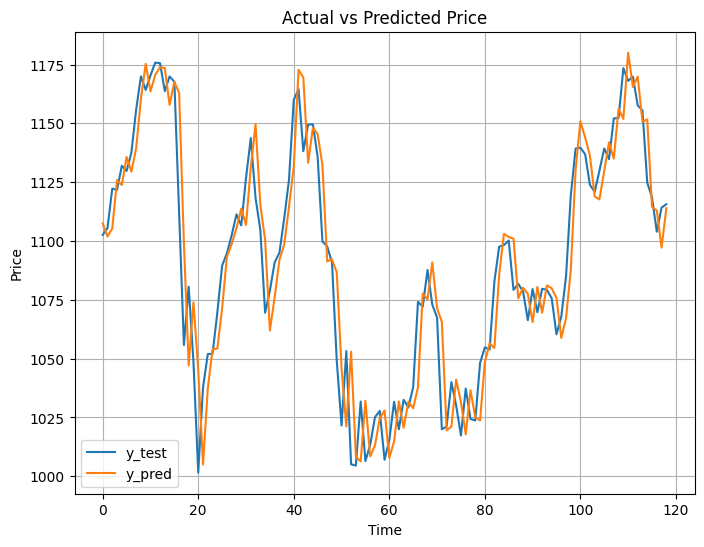

In [40]:
plt.figure(figsize=(8,6))

plt.plot(d['y_test'], label='y_test')
plt.plot(d['y_pred'], label='y_pred')

plt.title('Actual vs Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()